# Credit Card Users’ Segmentation Using Clustering Techniques

The purpose of the project is to segment credit card users into different groups in order to better serve the marketing efforts by targeting the group of users with a particular marketing campaign who are more likely to respond to it. 

## Importing Libraries and Reading File

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading file
data = pd.read_csv('/Users/damie/Downloads/Credit-Card-Segmentation-master/credit-card-data.csv') 

In [3]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Data Dictionary
● CUST_ID - Credit card holder's ID

● BALANCE - Monthly average balance

● BALANCE_FREQUENCY - How frequently the balance is updating, or, rate of credit card usage 

● PURCHASES - Total purchase amount 

● ONEOFF_PURCHASES - Total amount of one-off purchases

● INSTALLMENTS_PURCHASES - Total amount of instalment purchases

● CASH_ADVANCE - Total cash-advance (withdrawal of cash from ATM) amount

● PURCHASES_FREQUENCY - Frequency of purchases (PURCHASES_TRX/TENURE)

● ONEOFF_PURCHASES_FREQUENCY - Frequency of one-off-purchases

● PURCHASES_INSTALLMENTS_FREQUENCY - Frequency of instalment purchases

● CASH_ADVANCE_FREQUENCY - Cash-Advance frequency

● CASH_ADVANCE_TRX - Number of transactions made of "Cash in Advance"

● PURCHASES_TRX - Number of purchase transactions made

● CREDIT_LIMIT - Credit limit

● PAYMENTS - Total payments (due amount paid by the customer to decrease their
statement balance) in the period

● MINIMUM_PAYMENTS - Total minimum payments that were due in the period

● PRC_FULL_PAYMENT- Percentage of months with full payment of the due
statement balance

● TENURE - Number of months as a customer

## Descriptive Statistics

In [4]:
# Getting summary of the data
data.describe() 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Feature Engineering

### Deriving KPIs

In [5]:
data1 = data.copy()

####  Monthly Average Purchase and Cash Advance Amount
* Monthly average purchase = total amount of purchases / total tenure 
* Monthly average cash advance = total cash advance / total tenure 

In [6]:
data1["AVG_MONTH_PURCHASE"] = round(data1["PURCHASES"]/data1["TENURE"],2)
data1["AVG_MONTH_CASH_ADVANCE"] = round(data1["CASH_ADVANCE"]/data1["TENURE"],2)

####  Purchase Type 
* ONEOFF - users who only make oneoff purchases
* INSTALLMENTS - users who only make instalment purchases
* BOTH - users who make both types of purchases
* NONE - users who do not make either of the two types of purchases (they either make cash advance transactions or are inactive).

In [7]:
# The below function segregates users into diffrent groups as per their characterstics.
def type_check(data1):
    if (data1.ONEOFF_PURCHASES!=0.0) & (data1.INSTALLMENTS_PURCHASES!=0.0 ):
        return "BOTH"
    elif (data1.ONEOFF_PURCHASES==0.0) & (data1.INSTALLMENTS_PURCHASES!=0.0 ):
        return "INSTALMENTS"
    elif (data1.ONEOFF_PURCHASES!=0.0) & (data1.INSTALLMENTS_PURCHASES==0.0 ):
        return "ONEOFF"
    elif (data1.ONEOFF_PURCHASES==0.0) & (data1.INSTALLMENTS_PURCHASES==0.0):
        return "NONE"

In [8]:
# Applying the function.
data1["PURCHASE_TYPE"] = data1.apply(type_check,axis=1)

In [9]:
# Getting frequency table.
data1["PURCHASE_TYPE"].value_counts()

BOTH           2774
INSTALMENTS    2260
NONE           2042
ONEOFF         1874
Name: PURCHASE_TYPE, dtype: int64

#### Average Amount Per Purchase and Cash Advance Transaction
*  Average amount per purchase transaction = total amount of purchases / total purchase transaction 
*  Average amount cash advance transaction = total cash advance / total cash advance transction

In [10]:
data1["AVG_AMT_PURCHASE_TRX"] = round(data1["PURCHASES"]/data1["PURCHASES_TRX"],2)
data1["AVG_AMT_CASH_ADVANCE_TRX"] = round(data1["CASH_ADVANCE"]/data1["CASH_ADVANCE_TRX"],2)

In [11]:
# Getting count of null values for each variable.
data1.isna().sum()

CUST_ID                                0
BALANCE                                0
BALANCE_FREQUENCY                      0
PURCHASES                              0
ONEOFF_PURCHASES                       0
INSTALLMENTS_PURCHASES                 0
CASH_ADVANCE                           0
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY             0
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY                 0
CASH_ADVANCE_TRX                       0
PURCHASES_TRX                          0
CREDIT_LIMIT                           1
PAYMENTS                               0
MINIMUM_PAYMENTS                     313
PRC_FULL_PAYMENT                       0
TENURE                                 0
AVG_MONTH_PURCHASE                     0
AVG_MONTH_CASH_ADVANCE                 0
PURCHASE_TYPE                          0
AVG_AMT_PURCHASE_TRX                2041
AVG_AMT_CASH_ADVANCE_TRX            4628
dtype: int64

In [12]:
data1[['CASH_ADVANCE','CASH_ADVANCE_TRX','AVG_AMT_CASH_ADVANCE_TRX','PURCHASES','PURCHASES_TRX','AVG_AMT_PURCHASE_TRX']][(data1['AVG_AMT_CASH_ADVANCE_TRX'].isna()) | (data1['AVG_AMT_PURCHASE_TRX'].isna())]

,CASH_ADVANCE,CASH_ADVANCE_TRX,AVG_AMT_CASH_ADVANCE_TRX,PURCHASES,PURCHASES_TRX,AVG_AMT_PURCHASE_TRX
0,0.000000,0,NaN,95.40,2,47.70
1,6442.945483,4,1610.74,0.00,0,NaN
2,0.000000,0,NaN,773.17,12,64.43
4,0.000000,0,NaN,16.00,1,16.00
5,0.000000,0,NaN,1333.28,8,166.66
...,...,...,...,...,...,...
8944,0.000000,0,NaN,1012.73,2,506.36
8945,0.000000,0,NaN,291.12,6,48.52
8946,0.000000,0,NaN,300.00,6,50.00
8947,0.000000,0,NaN,144.40,5,28.88


In [13]:
# We can see NaNs are produced due to the division of 0 with 0, so let's replace them with a 0.
data1[['AVG_AMT_PURCHASE_TRX','AVG_AMT_CASH_ADVANCE_TRX']] = data1[['AVG_AMT_PURCHASE_TRX','AVG_AMT_CASH_ADVANCE_TRX']].fillna(0.0) 

In [14]:
# Checking whether each data point is finite or not.
for i in list(data1.columns): 
    if (type(data1[i][0]) == np.int64) | (type(data1[i][0]) == np.float64):
        print(i)
        print(np.isfinite(data1[i]).all())

BALANCE
True
BALANCE_FREQUENCY
True
PURCHASES
True
ONEOFF_PURCHASES
True
INSTALLMENTS_PURCHASES
True
CASH_ADVANCE
True
PURCHASES_FREQUENCY
True
ONEOFF_PURCHASES_FREQUENCY
True
PURCHASES_INSTALLMENTS_FREQUENCY
True
CASH_ADVANCE_FREQUENCY
True
CASH_ADVANCE_TRX
True
PURCHASES_TRX
True
CREDIT_LIMIT
False
PAYMENTS
True
MINIMUM_PAYMENTS
False
PRC_FULL_PAYMENT
True
TENURE
True
AVG_MONTH_PURCHASE
True
AVG_MONTH_CASH_ADVANCE
True
AVG_AMT_PURCHASE_TRX
False
AVG_AMT_CASH_ADVANCE_TRX
True


In [15]:
# We can see that there are some infinite values in AVG_AMT_PURCHASE_TRX variable, let's explore them.
data1[['PURCHASES','PURCHASES_TRX','AVG_AMT_PURCHASE_TRX']][data1['AVG_AMT_PURCHASE_TRX'] == np.inf]

,PURCHASES,PURCHASES_TRX,AVG_AMT_PURCHASE_TRX
1458,130.24,0,inf
3590,0.24,0,inf
4497,655.68,0,inf


We can see that these observations are anomolous, so let's drop them from the data.

In [16]:
# First, let's convert them into NaNs.
data1['AVG_AMT_PURCHASE_TRX'] = data1['AVG_AMT_PURCHASE_TRX'].replace([np.inf, -np.inf], np.nan)

In [17]:
# The 3 infinite values have been converted into NaNs.
data1.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
AVG_MONTH_PURCHASE                    0
AVG_MONTH_CASH_ADVANCE                0
PURCHASE_TYPE                         0
AVG_AMT_PURCHASE_TRX                  3
AVG_AMT_CASH_ADVANCE_TRX              0
dtype: int64

In [18]:
# Now let's drop those null values.
data1 = data1[data1['AVG_AMT_PURCHASE_TRX'].notna()]

In [19]:
# Observations consisting of inf. values have been dropped.
data1.shape

(8947, 23)

#### Limit Usage (or Balance to Credit Limit Ratio)
It tells us how much debt someone is carrying or how much credit they are using from their existing limit.
* Credit utilization ratio = balance  / credit limit



In [20]:
data1["CREDIT_UTILIZATION_RATIO"] = round(data1["BALANCE"]/data1["CREDIT_LIMIT"],2)

#### Payments to Minimum Payments Ratio
It tells us how much more than the minimum payment is a user paying.
* Payments to Minimum Payments Ratio = Payments made by the user / Minimum Payments due to the user

In [21]:
data1["PAY_MIN_PAY_RATIO"] = data1["PAYMENTS"]/data1["MINIMUM_PAYMENTS"]

In [22]:
# Let's have a look at the newly columns in our data
data1.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'AVG_MONTH_PURCHASE',
       'AVG_MONTH_CASH_ADVANCE', 'PURCHASE_TYPE', 'AVG_AMT_PURCHASE_TRX',
       'AVG_AMT_CASH_ADVANCE_TRX', 'CREDIT_UTILIZATION_RATIO',
       'PAY_MIN_PAY_RATIO'],
      dtype='object')

### Using the derived KPIs to gain insight on the customer profiles

#### Distribution Of Purchase Types

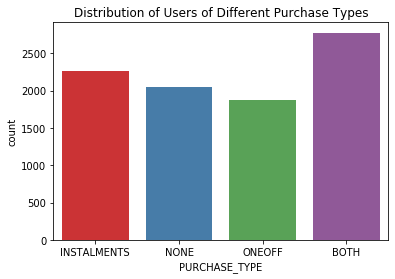

In [23]:
sns.countplot(data=data1,x="PURCHASE_TYPE",palette="Set1")
plt.title("Distribution of Users of Different Purchase Types")
plt.show()

#### Credit Utilization by Different Purchase Types

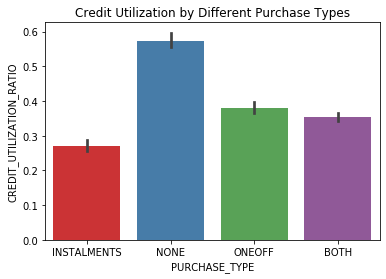

In [24]:
sns.barplot(data=data1,x="PURCHASE_TYPE",y="CREDIT_UTILIZATION_RATIO",palette="Set1")
plt.title("Credit Utilization by Different Purchase Types")
plt.show()

#### Total Purchases by Different Purchase Types

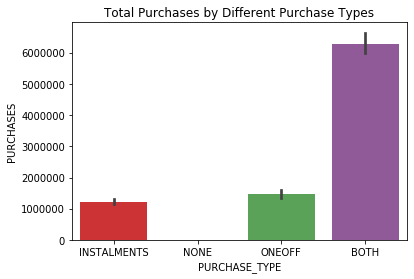

In [25]:
sns.barplot(data=data1, x="PURCHASE_TYPE", y="PURCHASES", estimator=sum, palette="Set1")
plt.title("Total Purchases by Different Purchase Types")
plt.show() 

## Data Preprocessing

### Handling Missing Data

In [26]:
# Let’s have a look at the count and percentage of observations that are missing in each variable.
miss = pd.DataFrame(data1.isnull().sum())
miss = miss.rename(columns={0:"miss_count"})
miss["miss_%"] = (miss.miss_count/len(data1.CUST_ID))*100
miss 

,miss_count,miss_%
CUST_ID,0,0.000000
BALANCE,0,0.000000
BALANCE_FREQUENCY,0,0.000000
PURCHASES,0,0.000000
ONEOFF_PURCHASES,0,0.000000
INSTALLMENTS_PURCHASES,0,0.000000
CASH_ADVANCE,0,0.000000
PURCHASES_FREQUENCY,0,0.000000
ONEOFF_PURCHASES_FREQUENCY,0,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.000000


We can see that only 4 columns have missing values and they form less than 30% of the total values present in the column. Therefore, we can impute them.

1. We will delete some known values from the dataframe
2. Then we will use different imputing techniques 
3. We will compare all imputation results of different techniques with the actual values
4. We will choose the imputation technique whose results are closer to the actual values

#### Imputing using Mean

In [27]:
data2 = data1.copy()

In [28]:
# Actual Values
data2['MINIMUM_PAYMENTS'].loc[5],data2['MINIMUM_PAYMENTS'].loc[505],data2['MINIMUM_PAYMENTS'].loc[5005], data2['MINIMUM_PAYMENTS'].loc[8005] 

(2407.246035, 156.644197, 11142.93224, 153.957216)

In [29]:
# Converting known values into NaNs for the purpose of imputation 
data2['MINIMUM_PAYMENTS'].loc[5] = np.nan
data2['MINIMUM_PAYMENTS'].loc[505] = np.nan
data2['MINIMUM_PAYMENTS'].loc[5005] = np.nan
data2['MINIMUM_PAYMENTS'].loc[8005] = np.nan

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
# Imputing with mean
data2['MINIMUM_PAYMENTS'] = data2['MINIMUM_PAYMENTS'].fillna(data2['MINIMUM_PAYMENTS'].mean())

In [31]:
# Imputed Values
data2['MINIMUM_PAYMENTS'].loc[5],data2['MINIMUM_PAYMENTS'].loc[505],data2['MINIMUM_PAYMENTS'].loc[5005], data2['MINIMUM_PAYMENTS'].loc[8005] 

(863.1498162215518, 863.1498162215518, 863.1498162215518, 863.1498162215518)

Since the values appear significantly far apart, we will use a different imputation method.

#### Imputing using Median

In [32]:
data2 = data1.copy()

In [33]:
# Actual Values
data2['MINIMUM_PAYMENTS'].loc[5],data2['MINIMUM_PAYMENTS'].loc[505],data2['MINIMUM_PAYMENTS'].loc[5005], data2['MINIMUM_PAYMENTS'].loc[8005] 

(2407.246035, 156.644197, 11142.93224, 153.957216)

In [34]:
# Converting known values into NaNs for the purpose of imputation 
data2['MINIMUM_PAYMENTS'].loc[5] = np.nan
data2['MINIMUM_PAYMENTS'].loc[505] = np.nan
data2['MINIMUM_PAYMENTS'].loc[5005] = np.nan
data2['MINIMUM_PAYMENTS'].loc[8005] = np.nan

In [35]:
# Imputing with median
data2['MINIMUM_PAYMENTS'] = data2['MINIMUM_PAYMENTS'].fillna(data2['MINIMUM_PAYMENTS'].median())

In [36]:
# Imputed Values
data2['MINIMUM_PAYMENTS'].loc[5],data2['MINIMUM_PAYMENTS'].loc[505],data2['MINIMUM_PAYMENTS'].loc[5005], data2['MINIMUM_PAYMENTS'].loc[8005] 

(312.4522915, 312.4522915, 312.4522915, 312.4522915)

Since the values are still significantly far apart, we will use a different imputation method.

#### Imputing using interpolation

In [37]:
data2 = data1.copy()

In [38]:
# Actual Values
data2['MINIMUM_PAYMENTS'].loc[5],data2['MINIMUM_PAYMENTS'].loc[505],data2['MINIMUM_PAYMENTS'].loc[5005], data2['MINIMUM_PAYMENTS'].loc[8005] 

(2407.246035, 156.644197, 11142.93224, 153.957216)

In [39]:
# Converting known values into NaNs for the purpose of imputation 
data2['MINIMUM_PAYMENTS'].loc[5] = np.nan
data2['MINIMUM_PAYMENTS'].loc[505] = np.nan
data2['MINIMUM_PAYMENTS'].loc[5005] = np.nan
data2['MINIMUM_PAYMENTS'].loc[8005] = np.nan

In [40]:
# Imputing with interploated values
data2=data2.interpolate() 

In [41]:
# Imputed Values 
data2['MINIMUM_PAYMENTS'].loc[5],data2['MINIMUM_PAYMENTS'].loc[505],data2['MINIMUM_PAYMENTS'].loc[5005], data2['MINIMUM_PAYMENTS'].loc[8005] 

(221.4285655, 844.759233, 588.8944570000001, 1802.9210875)

Since they are still not close enough, let's use another imputation method.

#### Imputing using KNN imputation

In order to get better results with KNN Imputation, we must first remove outliers from the data as KNN, being a distance-based algorithm, is sensitive to outliers. Then we should scale our variables in order to remove any bias towarads variables containing values of high magnitude.   

##### Removing Outliers

In [42]:
# Getting the lower and upper inner fences and then removing observations that lie outside them
data2 = data1.copy()
cnames=list(data2.columns)
for i in cnames:
    if (type(data2[i].iloc[1]) == np.float64) | (type(data2[i].iloc[1]) == np.int64):
        print(i)
        q75, q25 = np.percentile(data1.loc[:,i], [75 ,25])
        iqr = q75 - q25

        minimum = q25 - (iqr*3) 
        maximum = q75 + (iqr*3)
        print(minimum)
        print(maximum)
    
        data2 = data2.drop(data2[data2.loc[:,i] < minimum].index)    
        data2 = data2.drop(data2[data2.loc[:,i] > maximum].index)
data2.shape

BALANCE
-5650.3043275
7833.414928499999
BALANCE_FREQUENCY
0.5555559999999997
1.333333
PURCHASES
-3172.125
4322.110000000001
ONEOFF_PURCHASES
-1733.8349999999998
2311.7799999999997
INSTALLMENTS_PURCHASES
-1405.875
1874.5
CASH_ADVANCE
-3341.6894834999994
4455.585977999999
PURCHASES_FREQUENCY
-2.416669
3.416669
ONEOFF_PURCHASES_FREQUENCY
-0.8999999999999999
1.2
PURCHASES_INSTALLMENTS_FREQUENCY
-2.25
3.0
CASH_ADVANCE_FREQUENCY
-0.666666
0.8888879999999999
CASH_ADVANCE_TRX
-12.0
16.0
PURCHASES_TRX
-47.0
65.0
CREDIT_LIMIT
nan
nan
PAYMENTS
-4169.8543645
6454.122072
MINIMUM_PAYMENTS
nan
nan
PRC_FULL_PAYMENT
-0.4285709999999999
0.5714279999999999
TENURE
12.0
12.0
AVG_MONTH_PURCHASE
-278.115
378.765
AVG_MONTH_CASH_ADVANCE
-297.345
396.46000000000004
AVG_AMT_PURCHASE_TRX
-188.055
278.74
AVG_AMT_CASH_ADVANCE_TRX
-741.36
988.48
CREDIT_UTILIZATION_RATIO
nan
nan
PAY_MIN_PAY_RATIO
nan
nan


(4426, 25)

We can see that the outliers have been removed.

##### Scaling Variables
* First, we will check for normality of data using jarque-bera test so that we can apply a suitable scaling technique.
* Second, we will convert all the objects (categorical variables) into dummy variables.

In [43]:
# Making two separate lists of names of numerical and categorical variables 
data3 = data2.copy()
col = list(data3.columns)
num = []
obj = []
for i in col:
    if (type(data3[i].iloc[1]) == np.float64) | (type(data3[i].iloc[1]) == np.int64) :
        num.append(i)
    else :
        obj.append(i) 

In [44]:
obj

['CUST_ID', 'PURCHASE_TYPE']

###### Applying Jarque-Bera Test 
We'll apply the test on all numerical variables of the dataframe at alpha value of 0.05
* Null Hypothesis: data comes from a normal distribution.
* Alternate Hypothesis: data does not come from a normal distribution.

In [45]:
# Applying JB test
from scipy import stats
alpha = 0.05
col = list(data3[num].columns)
for i in col:
    print(i)
    stat,p = stats.jarque_bera(data3[i])
    print(stat, p)
    if p > alpha:
        print('Sample looks normal (fail to reject H0)')
    else:
        print('Sample does not look normal (reject H0)') 

BALANCE
3268.6699247913557 0.0
Sample does not look normal (reject H0)
BALANCE_FREQUENCY
18318.53196581929 0.0
Sample does not look normal (reject H0)
PURCHASES
2833.380184834107 0.0
Sample does not look normal (reject H0)
ONEOFF_PURCHASES
4735.865250314404 0.0
Sample does not look normal (reject H0)
INSTALLMENTS_PURCHASES
4407.504560022094 0.0
Sample does not look normal (reject H0)
CASH_ADVANCE
5377.482543947777 0.0
Sample does not look normal (reject H0)
PURCHASES_FREQUENCY
469.77912290458136 0.0
Sample does not look normal (reject H0)
ONEOFF_PURCHASES_FREQUENCY
3076.696815550629 0.0
Sample does not look normal (reject H0)
PURCHASES_INSTALLMENTS_FREQUENCY
557.4798685863327 0.0
Sample does not look normal (reject H0)
CASH_ADVANCE_FREQUENCY
2069.27493571367 0.0
Sample does not look normal (reject H0)
CASH_ADVANCE_TRX
3256.113721949354 0.0
Sample does not look normal (reject H0)
PURCHASES_TRX
2963.374686394953 0.0
Sample does not look normal (reject H0)
CREDIT_LIMIT
2331.535326019339 0

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1688: RuntimeWarning: invalid value encountered in double_scalars
  skewness = (1 / n * np.sum(diffx**3)) / (1 / n * np.sum(diffx**2))**(3 / 2.)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1689: RuntimeWarning: invalid value encountered in double_scalars
  kurtosis = (1 / n * np.sum(diffx**4)) / (1 / n * np.sum(diffx**2))**2


Since p-value is less than alpha, it shows strong evidence against our Null Hypothesis. Therefore, we will reject the Null Hypothesis, stating that the following columns of the dataframe are not normal.

Since our data is not normal, we will scale the variables using Min-Max Normalization technique.

In [46]:
# Importing minmax scaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [47]:
# Scaling data
data3 = pd.DataFrame((scaler.fit_transform(data3[num])))

In [48]:
# Assigning names to columns 
data3.columns = num

In [49]:
data3

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,AVG_MONTH_PURCHASE,AVG_MONTH_CASH_ADVANCE,AVG_AMT_PURCHASE_TRX,AVG_AMT_CASH_ADVANCE_TRX,CREDIT_UTILIZATION_RATIO,PAY_MIN_PAY_RATIO
0,0.005078,0.50,0.023724,0.000000,0.050919,0.000000,0.166667,0.000000,0.083333,0.0,...,0.031807,0.002424,0.000000,0.0,0.023724,0.000000,0.171422,0.000000,0.017167,0.006137
1,0.318955,1.00,0.192269,0.335384,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,...,0.098046,0.011077,0.000000,0.0,0.192265,0.000000,0.231546,0.000000,0.141631,0.004203
2,0.104425,1.00,0.003979,0.006940,0.000000,0.000000,0.083333,0.083333,0.000000,0.0,...,0.106915,0.004292,0.000000,0.0,0.003969,0.000000,0.057500,0.000000,0.291845,0.011771
3,0.231308,1.00,0.331555,0.000000,0.711629,0.000000,0.666667,0.000000,0.583333,0.0,...,0.220669,0.042655,0.000000,0.0,0.331563,0.000000,0.598936,0.000000,0.433476,0.002459
4,0.233076,1.00,0.108473,0.000000,0.232819,0.000000,1.000000,0.000000,1.000000,0.0,...,0.107030,0.009387,0.000000,0.0,0.108472,0.000000,0.130633,0.000000,0.339056,0.005414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,0.001948,0.75,0.109791,0.054092,0.169090,0.000000,1.000000,0.166667,0.916667,0.0,...,0.076056,0.001569,0.599999,0.0,0.109785,0.000000,0.113347,0.000000,0.008584,0.022458
4422,0.004709,1.00,0.053204,0.000000,0.114194,0.000000,0.916667,0.000000,0.833333,0.0,...,0.025769,0.003132,0.799999,0.0,0.053206,0.000000,0.069899,0.000000,0.012876,0.003861
4423,0.058098,1.00,0.096909,0.019390,0.184141,0.062258,1.000000,0.083333,0.916667,0.1,...,0.007659,0.064599,0.163636,0.0,0.096923,0.062271,0.100050,0.070043,0.197425,0.000042
4424,0.008464,1.00,0.073360,0.000000,0.157454,0.000000,0.500000,0.000000,0.416667,0.0,...,0.038724,0.002914,0.540000,0.0,0.073349,0.000000,0.176705,0.000000,0.030043,0.006238


###### Converting into Dummy Variables

In [50]:
# Categorial variables
obj

['CUST_ID', 'PURCHASE_TYPE']

In [51]:
# Converting PURCHASE_TYPE into dummy variables
purchase_type=pd.get_dummies(data2[obj[1]])

In [52]:
purchase_type

,BOTH,INSTALMENTS,NONE,ONEOFF
0,0,1,0,0
2,0,0,0,1
4,0,0,0,1
5,0,1,0,0
7,0,1,0,0
...,...,...,...,...
8747,1,0,0,0
8749,0,1,0,0
8754,1,0,0,0
8759,0,1,0,0


In [53]:
# Let's reset the index in order to match that of data3 so that we can concatenate (horizontally) them together
purchase_type = purchase_type.reset_index(drop=True)

In [54]:
# Conctenating dummy variables in the original dataframe
data3=pd.concat([data3,purchase_type],axis=1)

In [55]:
data3

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,AVG_MONTH_PURCHASE,AVG_MONTH_CASH_ADVANCE,AVG_AMT_PURCHASE_TRX,AVG_AMT_CASH_ADVANCE_TRX,CREDIT_UTILIZATION_RATIO,PAY_MIN_PAY_RATIO,BOTH,INSTALMENTS,NONE,ONEOFF
0,0.005078,0.50,0.023724,0.000000,0.050919,0.000000,0.166667,0.000000,0.083333,0.0,...,0.023724,0.000000,0.171422,0.000000,0.017167,0.006137,0,1,0,0
1,0.318955,1.00,0.192269,0.335384,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,...,0.192265,0.000000,0.231546,0.000000,0.141631,0.004203,0,0,0,1
2,0.104425,1.00,0.003979,0.006940,0.000000,0.000000,0.083333,0.083333,0.000000,0.0,...,0.003969,0.000000,0.057500,0.000000,0.291845,0.011771,0,0,0,1
3,0.231308,1.00,0.331555,0.000000,0.711629,0.000000,0.666667,0.000000,0.583333,0.0,...,0.331563,0.000000,0.598936,0.000000,0.433476,0.002459,0,1,0,0
4,0.233076,1.00,0.108473,0.000000,0.232819,0.000000,1.000000,0.000000,1.000000,0.0,...,0.108472,0.000000,0.130633,0.000000,0.339056,0.005414,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,0.001948,0.75,0.109791,0.054092,0.169090,0.000000,1.000000,0.166667,0.916667,0.0,...,0.109785,0.000000,0.113347,0.000000,0.008584,0.022458,1,0,0,0
4422,0.004709,1.00,0.053204,0.000000,0.114194,0.000000,0.916667,0.000000,0.833333,0.0,...,0.053206,0.000000,0.069899,0.000000,0.012876,0.003861,0,1,0,0
4423,0.058098,1.00,0.096909,0.019390,0.184141,0.062258,1.000000,0.083333,0.916667,0.1,...,0.096923,0.062271,0.100050,0.070043,0.197425,0.000042,1,0,0,0
4424,0.008464,1.00,0.073360,0.000000,0.157454,0.000000,0.500000,0.000000,0.416667,0.0,...,0.073349,0.000000,0.176705,0.000000,0.030043,0.006238,0,1,0,0


In [56]:
# Checking for null values
data3.isnull().sum()

BALANCE                              0
BALANCE_FREQUENCY                    0
PURCHASES                            0
ONEOFF_PURCHASES                     0
INSTALLMENTS_PURCHASES               0
CASH_ADVANCE                         0
PURCHASES_FREQUENCY                  0
ONEOFF_PURCHASES_FREQUENCY           0
PURCHASES_INSTALLMENTS_FREQUENCY     0
CASH_ADVANCE_FREQUENCY               0
CASH_ADVANCE_TRX                     0
PURCHASES_TRX                        0
CREDIT_LIMIT                         0
PAYMENTS                             0
MINIMUM_PAYMENTS                    70
PRC_FULL_PAYMENT                     0
TENURE                               0
AVG_MONTH_PURCHASE                   0
AVG_MONTH_CASH_ADVANCE               0
AVG_AMT_PURCHASE_TRX                 0
AVG_AMT_CASH_ADVANCE_TRX             0
CREDIT_UTILIZATION_RATIO             0
PAY_MIN_PAY_RATIO                   70
BOTH                                 0
INSTALMENTS                          0
NONE                     

In [57]:
data4 = data3.copy()

In [58]:
# Making list of Actual Values
og_vals = []

for i in [1,1001,2001,3001]:
    og_vals.append(data4['MINIMUM_PAYMENTS'].loc[i])

In [59]:
# Converting known values into NaNs for the purpose of imputation 
data4['MINIMUM_PAYMENTS'].loc[1] = np.nan
data4['MINIMUM_PAYMENTS'].loc[1001] = np.nan
data4['MINIMUM_PAYMENTS'].loc[2001] = np.nan
data4['MINIMUM_PAYMENTS'].loc[3001] = np.nan

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [60]:
# Importing library 
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=6) 
c = list(data4.columns)

In [61]:
# Imputing using KNN method
data4 = pd.DataFrame(imputer.fit_transform(data4), columns = c)

In [62]:
# Making list of Imputed Values 
imp_vals = []

for i in [1,1001,2001,3001]:
    imp_vals.append(data4['MINIMUM_PAYMENTS'].loc[i])

In [63]:
# Converting list to array for the purpose of broadcasting a mathematical operation
og_vals_ar = np.array(og_vals)
imp_vals_ar = np.array(imp_vals)

In [64]:
# Actual Values
og_vals_ar * 10000

array([110.77257639,  94.55678257, 330.25530328, 290.95634019])

In [65]:
# Imputed Values 
imp_vals_ar * 10000

array([ 88.38863089, 279.0490857 , 190.01063702, 168.88502209])

We can see that the values look close enough, so we'll use them in our model. 

In [66]:
# Checking for null values
data4.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
AVG_MONTH_PURCHASE                  0
AVG_MONTH_CASH_ADVANCE              0
AVG_AMT_PURCHASE_TRX                0
AVG_AMT_CASH_ADVANCE_TRX            0
CREDIT_UTILIZATION_RATIO            0
PAY_MIN_PAY_RATIO                   0
BOTH                                0
INSTALMENTS                         0
NONE                                0
ONEOFF      

We can see that all the null values have been removed. 

## Feature Extraction using PCA 

In [67]:
# Importing PCA function
from sklearn.decomposition import PCA

In [68]:
data5 = data4.copy()

In [69]:
# We have 27 features so our maximum number of components can be 28. Let's see how much variance in the data they explain.
pc = PCA(n_components=27) 
pc_fit = pc.fit(data5) 

In [70]:
# Percentage of variance explained 
sum(pc_fit.explained_variance_ratio_)

0.9999999999999997

In [71]:
# Percentage of variance explained by taking all the different possible number of components
cumm_var={}
for n in range(2,28):  
    pc=PCA(n_components=n)
    pc_fit=pc.fit(data5)
    cumm_var[n]=sum(pc_fit.explained_variance_ratio_)

In [72]:
cumm_var

{2: 0.5404011333705006,
 3: 0.6881240942869336,
 4: 0.7651440960023239,
 5: 0.8073764103096661,
 6: 0.8473636305324486,
 7: 0.8744135043883948,
 8: 0.8969775272261801,
 9: 0.9178907398277578,
 10: 0.9354735148467823,
 11: 0.9507026494059054,
 12: 0.9620822163739989,
 13: 0.9708224197568232,
 14: 0.9787766968143834,
 15: 0.9854702281402151,
 16: 0.9908262690171541,
 17: 0.9932277169561416,
 18: 0.9952364413596257,
 19: 0.9971401590176981,
 20: 0.9989114082370114,
 21: 0.9995975765088331,
 22: 0.999998589888793,
 23: 0.9999999999761572,
 24: 0.9999999999908877,
 25: 0.9999999999999997,
 26: 0.9999999999999997,
 27: 0.9999999999999997}

### Creating a Scree Plot

In [73]:
# Making lists of number of components and the respective variances explained by them
n_com = list(cumm_var.keys())
variance = list(cumm_var.values())

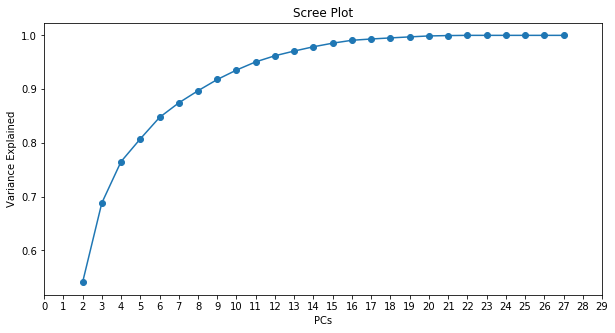

In [74]:
# Scree plot
plt.figure(figsize=(10,5))
plt.plot(n_com, variance, marker ="o")

plt.xticks(range(0, 30))

plt.title('Scree Plot')
plt.xlabel('PCs') 
plt.ylabel('Variance Explained')

plt.show()

From the above chart we can see that after the 14th component, the variance tends to increase very slowly. Therefore, 14 will be our optimal no. of components which explain around 97% variance in the data.

In [75]:
# Applying PCA and reducing our data set to 13 components
pc_final=PCA(n_components=13).fit(data5)
data5=pc_final.fit_transform(data5)

In [76]:
data5

array([[-0.15083226, -0.8216197 ,  0.3040581 , ..., -0.13103397,
        -0.06901996,  0.04797601],
       [ 0.18026682,  0.55009625,  1.05844512, ...,  0.19759519,
        -0.0978262 , -0.0530335 ],
       [-0.53090102,  0.15697669,  0.89320227, ..., -0.00719528,
         0.07764451,  0.1135221 ],
       ...,
       [ 0.83769261,  0.17987661, -0.40127278, ..., -0.04460914,
        -0.00229083, -0.10102979],
       [ 0.227244  , -0.90974283,  0.21647619, ..., -0.02239131,
         0.10164466, -0.08628277],
       [ 0.54798444,  0.41961327, -0.30000177, ..., -0.17755238,
        -0.07218305,  0.05235911]])

In [77]:
# Converting array to a dataframe 
data5 = pd.DataFrame(data5)

In [78]:
data5

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.150832,-0.821620,0.304058,-0.313262,0.441672,0.182465,0.343632,-0.313016,-0.038994,0.173337,-0.131034,-0.069020,0.047976
1,0.180267,0.550096,1.058445,0.118629,-0.605813,0.009202,-0.085463,-0.331494,0.229595,0.165934,0.197595,-0.097826,-0.053033
2,-0.530901,0.156977,0.893202,-0.211684,0.144837,-0.273675,-0.166060,0.175227,0.038875,-0.023920,-0.007195,0.077645,0.113522
3,0.519212,-0.824127,0.136052,0.140424,-0.075783,-0.181343,0.548871,0.290964,-0.268860,-0.044655,-0.115283,0.146019,-0.011918
4,0.678111,-1.014977,0.042136,0.125931,-0.178377,-0.269177,-0.050055,0.045125,0.056921,0.124691,0.036609,0.038741,-0.044201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,0.967155,0.153793,-0.282640,-0.393526,0.244015,0.235901,-0.572345,0.102773,0.076003,-0.128249,0.092628,0.135666,-0.128570
4422,0.610446,-1.049716,0.130347,-0.087776,-0.072557,0.291177,-0.326547,-0.117666,0.027179,-0.430140,0.100199,0.160832,-0.181421
4423,0.837693,0.179877,-0.401273,-0.128783,0.232081,-0.225134,-0.553506,0.092941,0.015840,-0.015289,-0.044609,-0.002291,-0.101030
4424,0.227244,-0.909743,0.216476,-0.175317,0.114411,0.173284,0.045981,-0.186760,-0.049071,-0.403609,-0.022391,0.101645,-0.086283


## Applying Clustering algorithm

### Kmeans

In [79]:
from sklearn.cluster import KMeans

#Estimate optimum number of clusters
cluster_range = range(1, 21)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters).fit(data5)
    cluster_errors.append(clusters.inertia_) 
    
#Create dataframe with cluster errors
clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors })

In [80]:
clusters_df

,num_clusters,cluster_errors
0,1,7493.882683
1,2,5285.877445
2,3,3895.943841
3,4,2656.339234
4,5,2419.626751
5,6,2240.929729
6,7,2088.657519
7,8,1960.759734
8,9,1846.268712
9,10,1737.837822


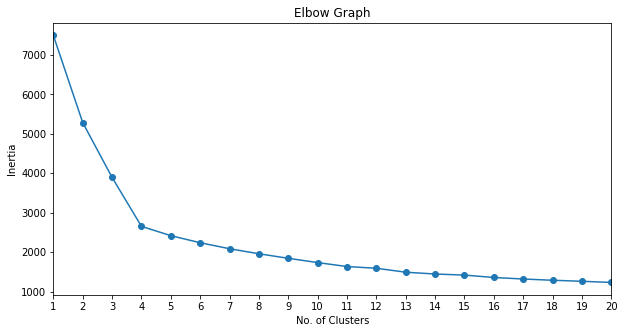

In [81]:
# Plotting Elbow Graph 
plt.figure(figsize=(10,5))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors,marker = "o")#", data=clusters_df)
plt.xlim(1,20)
plt.xticks(cluster_range)
plt.title('Elbow Graph')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')

plt.show()

From the above graph, we can see that the optimum number of clusters is 4. 

In [82]:
# Creating clusters using KMeans
Kmeans = KMeans(4).fit(data5)

In [83]:
# Predicting labels using our model 
kmeans_labels = list(Kmeans.predict(data5))

#### Output

In [84]:
# Creating a Two-Way Table 
label = list(data2.PURCHASE_TYPE) 
conf = pd.DataFrame({"cluster":kmeans_labels,"label":label})
pd.crosstab(conf.cluster,conf.label)

label,BOTH,INSTALMENTS,NONE,ONEOFF
cluster,,,,
0,0,0,0,889
1,1354,0,0,0
2,0,0,1107,0
3,0,1076,0,0


In [85]:
# Visualizing Clusters

# Taking the first 2 components to make a 2D visualization of clusters

data6=data5.iloc[:, :2]
data6['label'] = kmeans_labels
data6.columns =["x","y","label"]
data6

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,x,y,label
0,-0.150832,-0.821620,3
1,0.180267,0.550096,0
2,-0.530901,0.156977,0
3,0.519212,-0.824127,3
4,0.678111,-1.014977,3
...,...,...,...
4421,0.967155,0.153793,1
4422,0.610446,-1.049716,3
4423,0.837693,0.179877,1
4424,0.227244,-0.909743,3


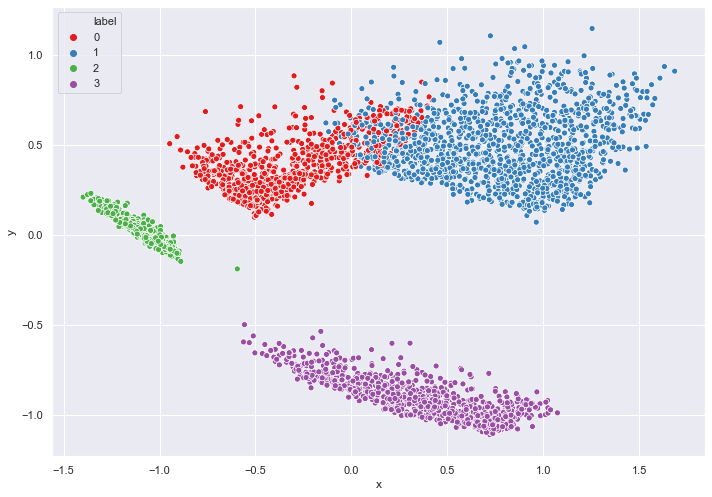

In [86]:
# Visualization
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(x="x", y="y", hue="label",
                     data=data6, palette="Set1")

In [87]:
# Add labels to the data frame
data4["labels"] = kmeans_labels
data4

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,AVG_MONTH_CASH_ADVANCE,AVG_AMT_PURCHASE_TRX,AVG_AMT_CASH_ADVANCE_TRX,CREDIT_UTILIZATION_RATIO,PAY_MIN_PAY_RATIO,BOTH,INSTALMENTS,NONE,ONEOFF,labels
0,0.005078,0.50,0.023724,0.000000,0.050919,0.000000,0.166667,0.000000,0.083333,0.0,...,0.000000,0.171422,0.000000,0.017167,0.006137,0.0,1.0,0.0,0.0,3
1,0.318955,1.00,0.192269,0.335384,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,...,0.000000,0.231546,0.000000,0.141631,0.004203,0.0,0.0,0.0,1.0,0
2,0.104425,1.00,0.003979,0.006940,0.000000,0.000000,0.083333,0.083333,0.000000,0.0,...,0.000000,0.057500,0.000000,0.291845,0.011771,0.0,0.0,0.0,1.0,0
3,0.231308,1.00,0.331555,0.000000,0.711629,0.000000,0.666667,0.000000,0.583333,0.0,...,0.000000,0.598936,0.000000,0.433476,0.002459,0.0,1.0,0.0,0.0,3
4,0.233076,1.00,0.108473,0.000000,0.232819,0.000000,1.000000,0.000000,1.000000,0.0,...,0.000000,0.130633,0.000000,0.339056,0.005414,0.0,1.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,0.001948,0.75,0.109791,0.054092,0.169090,0.000000,1.000000,0.166667,0.916667,0.0,...,0.000000,0.113347,0.000000,0.008584,0.022458,1.0,0.0,0.0,0.0,1
4422,0.004709,1.00,0.053204,0.000000,0.114194,0.000000,0.916667,0.000000,0.833333,0.0,...,0.000000,0.069899,0.000000,0.012876,0.003861,0.0,1.0,0.0,0.0,3
4423,0.058098,1.00,0.096909,0.019390,0.184141,0.062258,1.000000,0.083333,0.916667,0.1,...,0.062271,0.100050,0.070043,0.197425,0.000042,1.0,0.0,0.0,0.0,1
4424,0.008464,1.00,0.073360,0.000000,0.157454,0.000000,0.500000,0.000000,0.416667,0.0,...,0.000000,0.176705,0.000000,0.030043,0.006238,0.0,1.0,0.0,0.0,3


In [88]:
# Calculating the mean values of features within each cluster
df_mean = (data4.groupby('labels').mean())
df_mean

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,AVG_MONTH_PURCHASE,AVG_MONTH_CASH_ADVANCE,AVG_AMT_PURCHASE_TRX,AVG_AMT_CASH_ADVANCE_TRX,CREDIT_UTILIZATION_RATIO,PAY_MIN_PAY_RATIO,BOTH,INSTALMENTS,NONE,ONEOFF
labels,,,,,,,,,,,,,,,,,,,,,
0,0.189779,0.920416,0.115984,0.202379,0.000000,0.111462,0.340832,0.340364,0.000000,0.133408,...,0.115983,0.111461,0.304463,0.113509,0.209654,0.013081,0.0,0.0,0.0,1.0
1,0.185103,0.933161,0.286265,0.284623,0.264327,0.089572,0.754001,0.357582,0.592935,0.104284,...,0.286262,0.089571,0.221422,0.096571,0.171389,0.017540,1.0,0.0,0.0,0.0
2,0.254098,0.943089,0.000000,0.000000,0.000000,0.239071,0.000301,0.000000,0.000301,0.286902,...,0.000000,0.239069,0.000000,0.257696,0.282017,0.011040,0.0,0.0,1.0,0.0
3,0.126936,0.884294,0.107583,0.000000,0.231108,0.059235,0.706862,0.000000,0.683008,0.064963,...,0.107582,0.059234,0.148249,0.069301,0.176648,0.013127,0.0,1.0,0.0,0.0


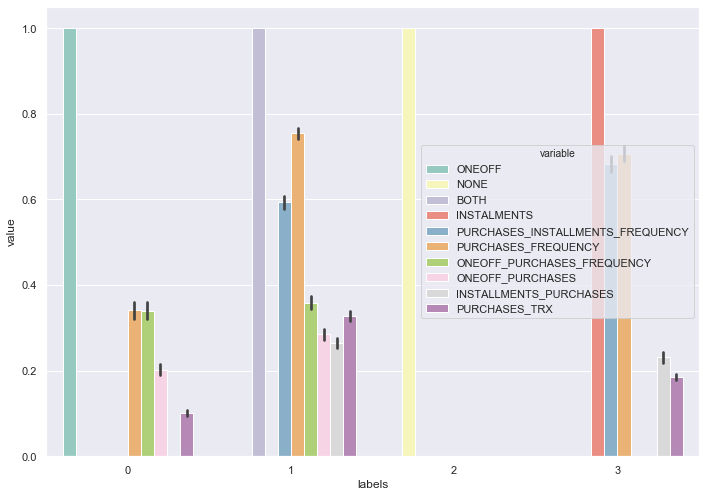

In [89]:
# Calculate the inter-cluster variance in the mean values of each variable
results = pd.DataFrame(columns=['Variable', 'Var'])

# Select top 10 variables with the highest variance of mean values among clusters 
for column in df_mean.columns:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(10)['Variable']) + ['labels']

tidy = data4[selected_columns].melt(id_vars='labels')

sns.barplot(x='labels', y='value', hue='variable', data=tidy, palette="Set3")

### Kmedoids

In [90]:
data7 = data1.copy()

In [91]:
# Checking for NaNs
data7.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
AVG_MONTH_PURCHASE                    0
AVG_MONTH_CASH_ADVANCE                0
PURCHASE_TYPE                         0
AVG_AMT_PURCHASE_TRX                  0
AVG_AMT_CASH_ADVANCE_TRX              0
CREDIT_UTILIZATION_RATIO              1
PAY_MIN_PAY_RATIO                   313


In [92]:
# Removing observations with null values
data7 = data7.dropna()

In [93]:
# Making two separate lists of names of numerical and categorical variables 

col = list(data7.columns)
num = []
obj = []
for i in col:
    if (type(data7[i].iloc[1]) == np.float64) | (type(data7[i].iloc[1]) == np.int64) :
        num.append(i)
    else :
        obj.append(i) 

In [94]:
# Categorical variables
obj

['CUST_ID', 'PURCHASE_TYPE']

In [95]:
# Applying JB test
from scipy import stats
alpha = 0.05
col = list(data7[num].columns)
for i in col:
    print(i)
    stat,p = stats.jarque_bera(data7[i])
    print(stat, p)
    if p > alpha:
        print('Sample looks normal (fail to reject H0)')
    else:
        print('Sample does not look normal (reject H0)')

BALANCE
28591.95737947251 0.0
Sample does not look normal (reject H0)
BALANCE_FREQUENCY
10363.787472138165 0.0
Sample does not look normal (reject H0)
PURCHASES
4334318.1436165925 0.0
Sample does not look normal (reject H0)
ONEOFF_PURCHASES
9348290.15606885 0.0
Sample does not look normal (reject H0)
INSTALLMENTS_PURCHASES
3260763.598643625 0.0
Sample does not look normal (reject H0)
CASH_ADVANCE
1014324.9063780463 0.0
Sample does not look normal (reject H0)
PURCHASES_FREQUENCY
966.2076057111685 0.0
Sample does not look normal (reject H0)
ONEOFF_PURCHASES_FREQUENCY
3652.893713144803 0.0
Sample does not look normal (reject H0)
PURCHASES_INSTALLMENTS_FREQUENCY
1066.4771976279694 0.0
Sample does not look normal (reject H0)
CASH_ADVANCE_FREQUENCY
8273.592356507628 0.0
Sample does not look normal (reject H0)
CASH_ADVANCE_TRX
1357563.5946483894 0.0
Sample does not look normal (reject H0)
PURCHASES_TRX
444119.58638778166 0.0
Sample does not look normal (reject H0)
CREDIT_LIMIT
6038.1745600637

Since our data is not normal, we will scale the variables using Min-Max Normalization technique.

In [96]:
# Scaling data 
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
data7 = pd.DataFrame((scaler.fit_transform(data7[num])))

In [97]:
# Assigning columns names
data7.columns = num

In [98]:
data7

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,AVG_MONTH_PURCHASE,AVG_MONTH_CASH_ADVANCE,AVG_AMT_PURCHASE_TRX,AVG_AMT_CASH_ADVANCE_TRX,CREDIT_UTILIZATION_RATIO,PAY_MIN_PAY_RATIO
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.003978,0.001826,0.000000,1.0,0.001945,0.000000,0.007974,0.000000,0.002514,0.000211
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,...,0.080892,0.014034,0.222222,1.0,0.000000,0.136684,0.000000,0.108566,0.028913,0.000559
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.012263,0.008210,0.000000,1.0,0.015766,0.000000,0.010771,0.000000,0.020742,0.000145
3,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.013373,0.003204,0.000000,1.0,0.000325,0.000000,0.002675,0.000000,0.042740,0.000405
4,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,...,0.027602,0.031506,0.000000,1.0,0.027189,0.000000,0.027862,0.000000,0.063482,0.000085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8628,0.000308,0.500000,0.000426,0.000513,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,...,0.001155,0.000569,0.000000,0.0,0.000852,0.000000,0.003494,0.000000,0.000629,0.000197
8629,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.006418,0.000640,0.500000,0.0,0.011873,0.000000,0.008111,0.000000,0.001886,0.000974
8630,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,...,0.001601,0.001078,0.250000,0.0,0.005890,0.000000,0.004828,0.000000,0.001257,0.000144
8631,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,...,0.001035,0.000729,0.250000,0.0,0.000000,0.001550,0.000000,0.001232,0.001886,0.000138


In [99]:
# Converting PURCHASE_TYPE into dummy variables
purchase_type=pd.get_dummies(data1.dropna().PURCHASE_TYPE)

In [100]:
purchase_type

,BOTH,INSTALMENTS,NONE,ONEOFF
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
4,0,0,0,1
5,0,1,0,0
...,...,...,...,...
8943,0,0,0,1
8945,0,1,0,0
8947,0,1,0,0
8948,0,0,1,0


In [101]:
# Let's reset the index in order to match that of data3 so that we can concatenate (horizontally) them together
purchase_type = purchase_type.reset_index(drop=True)

In [102]:
# Conctenating dummy variables in the original dataframe
data7=pd.concat([data7,purchase_type],axis=1)

In [103]:
data7

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,AVG_MONTH_PURCHASE,AVG_MONTH_CASH_ADVANCE,AVG_AMT_PURCHASE_TRX,AVG_AMT_CASH_ADVANCE_TRX,CREDIT_UTILIZATION_RATIO,PAY_MIN_PAY_RATIO,BOTH,INSTALMENTS,NONE,ONEOFF
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.001945,0.000000,0.007974,0.000000,0.002514,0.000211,0,1,0,0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,...,0.000000,0.136684,0.000000,0.108566,0.028913,0.000559,0,0,1,0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.015766,0.000000,0.010771,0.000000,0.020742,0.000145,0,0,0,1
3,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000325,0.000000,0.002675,0.000000,0.042740,0.000405,0,0,0,1
4,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,...,0.027189,0.000000,0.027862,0.000000,0.063482,0.000085,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8628,0.000308,0.500000,0.000426,0.000513,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,...,0.000852,0.000000,0.003494,0.000000,0.000629,0.000197,0,0,0,1
8629,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.011873,0.000000,0.008111,0.000000,0.001886,0.000974,0,1,0,0
8630,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,...,0.005890,0.000000,0.004828,0.000000,0.001257,0.000144,0,1,0,0
8631,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,...,0.000000,0.001550,0.000000,0.001232,0.001886,0.000138,0,0,1,0


In [104]:
# Importing PCA
from sklearn.decomposition import PCA

In [105]:
data8 = data7.copy()

In [106]:
# We have 28 features so our maximum number of components can be 28. Let's see how much variance in the data they explain.
pc=PCA(n_components=27) 
pc_fit=pc.fit(data8) 

In [107]:
sum(pc_fit.explained_variance_ratio_)

0.9999999999999999

In [108]:
# Percentage of variance explained by taking all the different possible number of components
cumm_var={}
for n in range(2,28): 
    pc=PCA(n_components=n)
    pc_fit=pc.fit(data8)
    cumm_var[n]=sum(pc_fit.explained_variance_ratio_)

In [109]:
cumm_var

{2: 0.6001273601804925,
 3: 0.7658555842086868,
 4: 0.8267574792589775,
 5: 0.8737176437875575,
 6: 0.9081126498492343,
 7: 0.9339323698092762,
 8: 0.9559087304639606,
 9: 0.9728419056373169,
 10: 0.9817129802891642,
 11: 0.9870956206714376,
 12: 0.9903630202316106,
 13: 0.9933055940115328,
 14: 0.9953219659817778,
 15: 0.9964324934948211,
 16: 0.9972126707592748,
 17: 0.9978181857125449,
 18: 0.9983758505439974,
 19: 0.9988916341621257,
 20: 0.9992699843875529,
 21: 0.999571980372428,
 22: 0.9997881702534387,
 23: 0.9999689652637705,
 24: 0.9999940734050701,
 25: 0.9999999847267398,
 26: 0.9999999999999999,
 27: 0.9999999999999999}

In [110]:
# Making lists of number of components and the respective variances explained by them
com = list(cumm_var.keys())
variance = list(cumm_var.values())

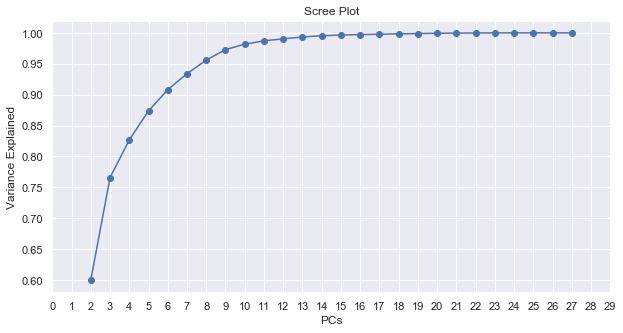

In [111]:
# Scree plot
plt.figure(figsize=(10,5))
plt.plot(com, variance, marker ="o")

plt.xticks(range(0, 30))

plt.title('Scree Plot')
plt.xlabel('PCs') 
plt.ylabel('Variance Explained')

plt.show()

From the above chart we can see that after the 10th component, the variance tends to increase very slowly. Therefore, 10 will be our optimal no. of components which explain around 98% variance in the data.

In [112]:
# Applying PCA and reducing our data set to 10 components
pc_final=PCA(n_components=10).fit(data8)
data8=pc_final.fit_transform(data8)

In [113]:
data8

array([[-0.26038914,  0.75839442,  0.07978759, ..., -0.14614395,
        -0.16477267,  0.01113131],
       [-0.93390867, -0.04695324, -0.55091196, ..., -0.03501565,
         0.11731431,  0.04499703],
       [-0.01350243, -0.49128488,  1.01289485, ...,  0.1888484 ,
        -0.08827742, -0.0069748 ],
       ...,
       [ 0.37195862,  0.95716278,  0.07892571, ..., -0.06019788,
        -0.12618907,  0.09768455],
       [-0.95830407,  0.01785218, -0.52756692, ..., -0.01953654,
        -0.17511575,  0.11273107],
       [-0.31040347, -0.33910802,  0.93265157, ...,  0.16760342,
        -0.0263759 , -0.0965071 ]])

In [114]:
data8 = pd.DataFrame(data8)

In [115]:
data8

,0,1,2,3,4,5,6,7,8,9
0,-0.260389,0.758394,0.079788,-0.204790,0.372836,-0.151263,0.394801,-0.146144,-0.164773,0.011131
1,-0.933909,-0.046953,-0.550912,0.215092,-0.131954,-0.124948,-0.040849,-0.035016,0.117314,0.044997
2,-0.013502,-0.491285,1.012895,-0.013564,-0.648981,-0.048845,0.374752,0.188848,-0.088277,-0.006975
3,-0.667586,-0.217209,0.763701,-0.199454,0.108926,-0.094533,-0.229736,-0.089395,-0.159564,0.056834
4,0.252990,0.859440,0.043684,-0.303346,-0.031109,-0.096168,0.119053,-0.059379,-0.100651,0.032894
...,...,...,...,...,...,...,...,...,...,...
8628,-0.663456,-0.173979,0.820744,0.016117,0.301435,0.932556,-0.043191,0.177546,-0.048183,0.112720
8629,0.580634,1.010433,0.076974,0.226156,-0.161933,0.877294,-0.065385,-0.169708,-0.155294,0.099464
8630,0.371959,0.957163,0.078926,0.050411,0.006630,0.892098,0.098686,-0.060198,-0.126189,0.097685
8631,-0.958304,0.017852,-0.527567,0.369426,-0.030013,0.857941,-0.010556,-0.019537,-0.175116,0.112731


In [116]:
from sklearn_extra.cluster import KMedoids

#Estimate optimum number of clusters
cluster_range = range(1, 21)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMedoids(num_clusters).fit(data8)
    cluster_errors.append(clusters.inertia_)
    
#Create dataframe with cluster errors
clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors })

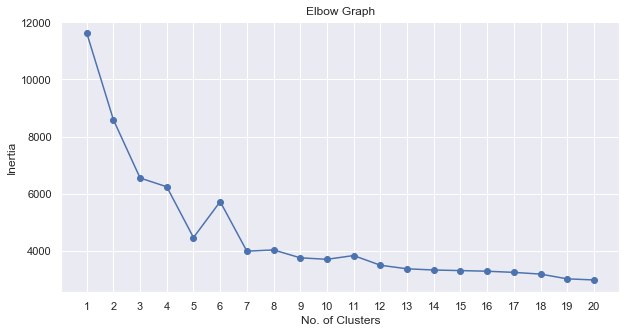

In [117]:
# Plotting Elbow Graph
plt.figure(figsize=(10,5))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")

plt.xticks(cluster_range)
plt.title('Elbow Graph')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

In [118]:
# Calculate point of maximum curvature (or knee)
from kneed import KneeLocator
x = range(0,8633)
kneedle = KneeLocator(clusters_df.num_clusters, clusters_df.cluster_errors, curve='convex', direction='decreasing')
kneedle.knee_y

4462.214585470383

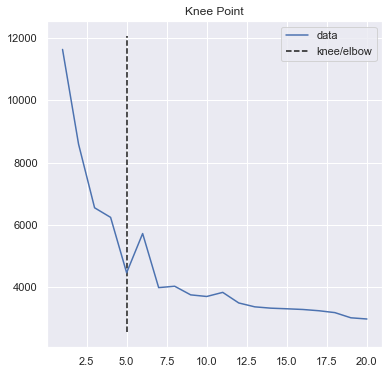

In [119]:
# Visualize knee-point
kneedle.plot_knee()

From the above graph, we can see that the optimum number of clusters is 5. 

In [120]:
# Creating clusters using KMedoids
clust_final = KMedoids(5).fit(data8)

In [121]:
# Predicting labels using our model 
kmedoids_labels = list(clust_final.predict(data8))

#### Output

In [122]:
# Creating a Two-Way Table 
label = list(data1.dropna().PURCHASE_TYPE)
conf = pd.DataFrame({"cluster":kmedoids_labels, "label":label})
pd.crosstab(conf.cluster,conf.label)

label,BOTH,INSTALMENTS,NONE,ONEOFF
cluster,,,,
0,1597,0,0,0
1,0,2146,0,0
2,0,0,0,1781
3,1144,0,0,0
4,0,0,1965,0


In [123]:
# Visualizing Clusters

# Taking the first 2 components to make a 2D visualization of clusters

data9=data8.iloc[:, :2]
data9['label'] = kmedoids_labels
data9.columns =["x","y","label"]
data9

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,x,y,label
0,-0.260389,0.758394,1
1,-0.933909,-0.046953,4
2,-0.013502,-0.491285,2
3,-0.667586,-0.217209,2
4,0.252990,0.859440,1
...,...,...,...
8628,-0.663456,-0.173979,2
8629,0.580634,1.010433,1
8630,0.371959,0.957163,1
8631,-0.958304,0.017852,4


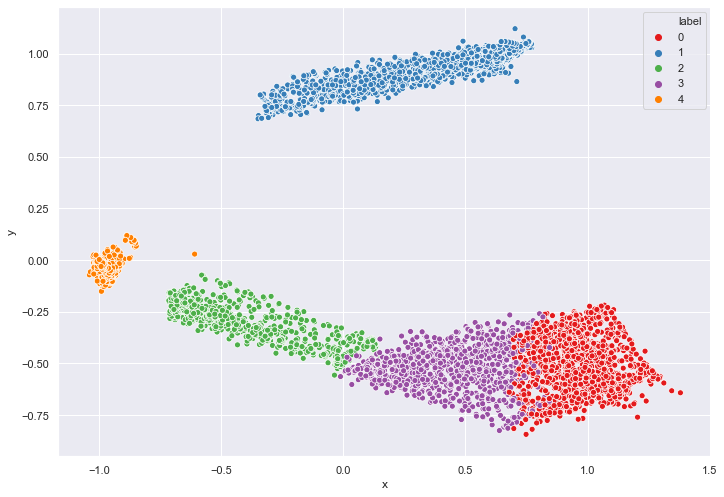

In [124]:
# Visualization
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(x="x", y="y", hue="label",
                     data=data9, palette="Set1")

In [125]:
# Add labels to the data frame
data7["labels"] = kmedoids_labels
data7

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,AVG_MONTH_CASH_ADVANCE,AVG_AMT_PURCHASE_TRX,AVG_AMT_CASH_ADVANCE_TRX,CREDIT_UTILIZATION_RATIO,PAY_MIN_PAY_RATIO,BOTH,INSTALMENTS,NONE,ONEOFF,labels
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,0.007974,0.000000,0.002514,0.000211,0,1,0,0,1
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,...,0.136684,0.000000,0.108566,0.028913,0.000559,0,0,1,0,4
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.010771,0.000000,0.020742,0.000145,0,0,0,1,2
3,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,0.002675,0.000000,0.042740,0.000405,0,0,0,1,2
4,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,...,0.000000,0.027862,0.000000,0.063482,0.000085,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8628,0.000308,0.500000,0.000426,0.000513,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,...,0.000000,0.003494,0.000000,0.000629,0.000197,0,0,0,1,2
8629,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.000000,0.008111,0.000000,0.001886,0.000974,0,1,0,0,1
8630,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,...,0.000000,0.004828,0.000000,0.001257,0.000144,0,1,0,0,1
8631,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,...,0.001550,0.000000,0.001232,0.001886,0.000138,0,0,1,0,4


In [126]:
# Calculating the mean values of features within each cluster
df_mean = (data7.groupby('labels').mean())
df_mean

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,AVG_MONTH_PURCHASE,AVG_MONTH_CASH_ADVANCE,AVG_AMT_PURCHASE_TRX,AVG_AMT_CASH_ADVANCE_TRX,CREDIT_UTILIZATION_RATIO,PAY_MIN_PAY_RATIO,BOTH,INSTALMENTS,NONE,ONEOFF
labels,,,,,,,,,,,,,,,,,,,,,
0,0.105831,0.982270,0.062790,0.044537,0.056170,0.015413,0.968010,0.539433,0.853391,0.066071,...,0.063829,0.016227,0.011279,0.008603,0.021913,0.001259,1,0,0,0
1,0.046226,0.852304,0.011259,0.000000,0.024585,0.009300,0.701980,0.000000,0.664863,0.037119,...,0.011817,0.010209,0.008934,0.006961,0.017743,0.002036,0,1,0,0
2,0.077787,0.853763,0.016331,0.019649,0.000000,0.018993,0.325711,0.325478,0.000000,0.086374,...,0.017316,0.020683,0.028412,0.011258,0.024683,0.000839,0,0,0,1
3,0.080204,0.904126,0.023639,0.019265,0.016634,0.017530,0.567746,0.294576,0.344453,0.079133,...,0.024343,0.018834,0.015001,0.008723,0.022792,0.000804,1,0,0,0
4,0.115848,0.903407,0.000000,0.000000,0.000000,0.042590,0.000170,0.000000,0.000170,0.184581,...,0.000000,0.046928,0.000000,0.031622,0.037035,0.001530,0,0,1,0


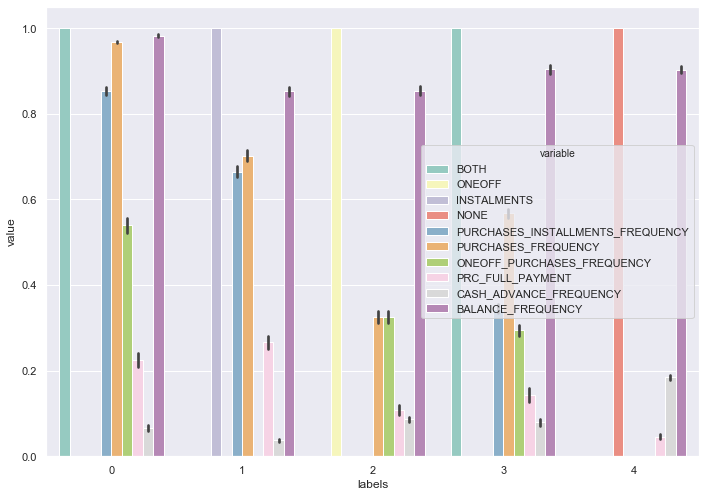

In [127]:
# Calculate the inter-cluster variance in the mean values of each variable
results = pd.DataFrame(columns=['Variable', 'Var'])

# Select top 10 variables with the highest variance of mean values among clusters 
for column in df_mean.columns:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(10).Variable.values) + ['labels']
tidy = data7[selected_columns].melt(id_vars='labels')
sns.barplot(x='labels', y='value', hue='variable', data=tidy,palette="Set3")

### DBSCAN

In [128]:
data8

,0,1,2,3,4,5,6,7,8,9
0,-0.260389,0.758394,0.079788,-0.204790,0.372836,-0.151263,0.394801,-0.146144,-0.164773,0.011131
1,-0.933909,-0.046953,-0.550912,0.215092,-0.131954,-0.124948,-0.040849,-0.035016,0.117314,0.044997
2,-0.013502,-0.491285,1.012895,-0.013564,-0.648981,-0.048845,0.374752,0.188848,-0.088277,-0.006975
3,-0.667586,-0.217209,0.763701,-0.199454,0.108926,-0.094533,-0.229736,-0.089395,-0.159564,0.056834
4,0.252990,0.859440,0.043684,-0.303346,-0.031109,-0.096168,0.119053,-0.059379,-0.100651,0.032894
...,...,...,...,...,...,...,...,...,...,...
8628,-0.663456,-0.173979,0.820744,0.016117,0.301435,0.932556,-0.043191,0.177546,-0.048183,0.112720
8629,0.580634,1.010433,0.076974,0.226156,-0.161933,0.877294,-0.065385,-0.169708,-0.155294,0.099464
8630,0.371959,0.957163,0.078926,0.050411,0.006630,0.892098,0.098686,-0.060198,-0.126189,0.097685
8631,-0.958304,0.017852,-0.527567,0.369426,-0.030013,0.857941,-0.010556,-0.019537,-0.175116,0.112731


In [129]:
# Importing libraries
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [130]:
# MinPoints = 2 * No. of Features
# Finding distances to 19 (or MinPoints-1) nearest neighbours of each observation
neigh = NearestNeighbors(n_neighbors=20)
nbrs = neigh.fit(data8)
distances, indices = nbrs.kneighbors(data8)

In [131]:
distances

array([[0.        , 0.1014702 , 0.11271534, ..., 0.19632039, 0.19740313,
        0.19751411],
       [0.        , 0.08912432, 0.09665003, ..., 0.17563805, 0.17699978,
        0.1782123 ],
       [0.        , 0.02317591, 0.03859537, ..., 0.09546901, 0.09553495,
        0.10321637],
       ...,
       [0.        , 0.23175915, 0.26615371, ..., 0.34934033, 0.35322676,
        0.356915  ],
       [0.        , 0.17603442, 0.18771805, ..., 0.31040155, 0.31260832,
        0.32192687],
       [0.        , 0.19857988, 0.25671825, ..., 0.44508254, 0.44704936,
        0.45486694]])

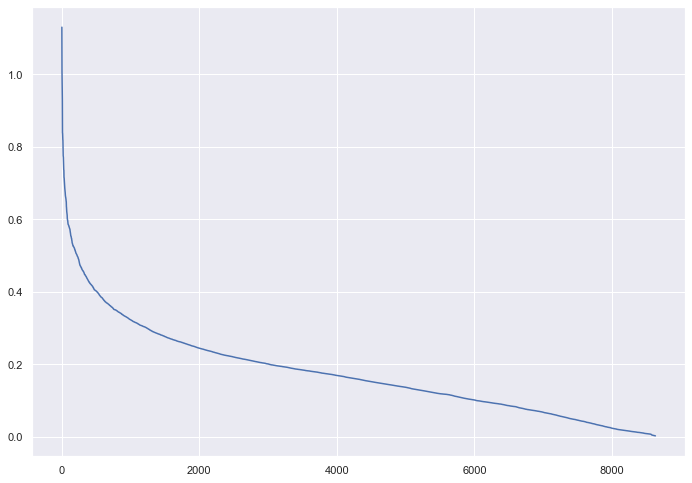

In [132]:
# Selecting distances to the 19th neighbour of each observation and plotting them
distances = np.sort(distances[:,-1], axis=0)[::-1]
plt.plot(distances)

In [133]:
# Calculate point of maximum curvature (or knee) to get the optimal value of eps
from kneed import KneeLocator
x = range(0,8633)
kneedle = KneeLocator(x, distances, curve='convex', direction='decreasing')
kneedle.knee_y

0.5257065802850234

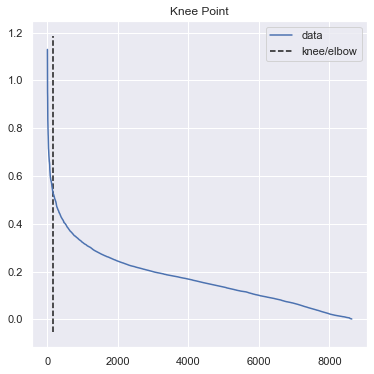

In [134]:
# Visualize knee-point
kneedle.plot_knee()

In [135]:
# Creating clusters using DBSCAN
dbscan = DBSCAN(eps=0.5257, min_samples=20)
model = dbscan.fit(data8)

In [136]:
# Predicting labels using our model 
dbscan_labels = model.labels_

#### Output

In [137]:
# Creating a Two-Way Table 
label = list(data1.dropna().PURCHASE_TYPE)
conf = pd.DataFrame({"cluster":dbscan_labels,"label":label})
pd.crosstab(conf.cluster,conf.label)

label,BOTH,INSTALMENTS,NONE,ONEOFF
cluster,,,,
-1,15,0,4,6
0,0,2146,0,0
1,0,0,1961,0
2,0,0,0,1775
3,2726,0,0,0


In [138]:
# Visualizing Clusters

# Taking the first 2 components to make a 2D visualization of clusters
data9["label"]=dbscan_labels
data9 = data9[data9['label'] > -1]
data9

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,x,y,label
0,-0.260389,0.758394,0
1,-0.933909,-0.046953,1
2,-0.013502,-0.491285,2
3,-0.667586,-0.217209,2
4,0.252990,0.859440,0
...,...,...,...
8628,-0.663456,-0.173979,2
8629,0.580634,1.010433,0
8630,0.371959,0.957163,0
8631,-0.958304,0.017852,1


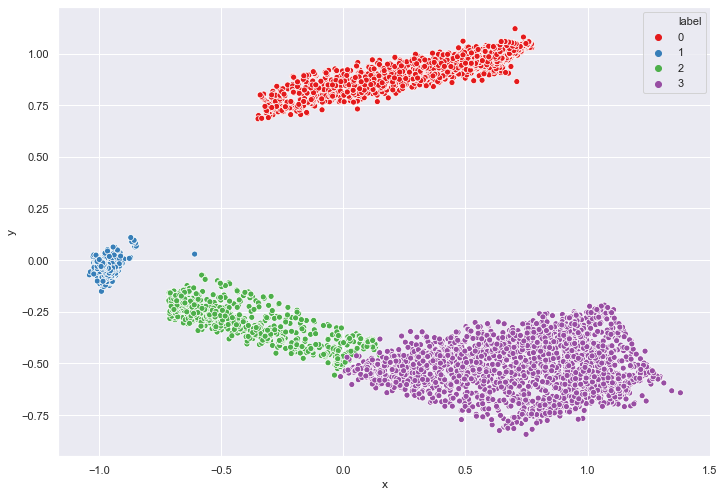

In [139]:
# Visualization
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(x="x", y="y", hue="label",
                     data=data9,palette="Set1")

In [140]:
# Extracting only required observtions 
data7 = data7.iloc[list(data9.index)]

In [141]:
data7

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,AVG_MONTH_CASH_ADVANCE,AVG_AMT_PURCHASE_TRX,AVG_AMT_CASH_ADVANCE_TRX,CREDIT_UTILIZATION_RATIO,PAY_MIN_PAY_RATIO,BOTH,INSTALMENTS,NONE,ONEOFF,labels
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,0.007974,0.000000,0.002514,0.000211,0,1,0,0,1
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,...,0.136684,0.000000,0.108566,0.028913,0.000559,0,0,1,0,4
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.010771,0.000000,0.020742,0.000145,0,0,0,1,2
3,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,0.002675,0.000000,0.042740,0.000405,0,0,0,1,2
4,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,...,0.000000,0.027862,0.000000,0.063482,0.000085,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8628,0.000308,0.500000,0.000426,0.000513,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,...,0.000000,0.003494,0.000000,0.000629,0.000197,0,0,0,1,2
8629,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.000000,0.008111,0.000000,0.001886,0.000974,0,1,0,0,1
8630,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,...,0.000000,0.004828,0.000000,0.001257,0.000144,0,1,0,0,1
8631,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,...,0.001550,0.000000,0.001232,0.001886,0.000138,0,0,1,0,4


In [142]:
# Add labels to the data frame
data7["labels"] = data9['label']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [143]:
# Calculating the mean values of features within each cluster
df_mean8 = (data7.groupby('labels').mean())
df_mean8

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,AVG_MONTH_PURCHASE,AVG_MONTH_CASH_ADVANCE,AVG_AMT_PURCHASE_TRX,AVG_AMT_CASH_ADVANCE_TRX,CREDIT_UTILIZATION_RATIO,PAY_MIN_PAY_RATIO,BOTH,INSTALMENTS,NONE,ONEOFF
labels,,,,,,,,,,,,,,,,,,,,,
0,0.046226,0.852304,0.011259,0.000000,0.024585,0.009300,0.701980,0.000000,0.664863,0.037119,...,0.011817,0.010209,0.008934,0.006961,0.017743,0.002036,0,1,0,0
1,0.116077,0.904485,0.000000,0.000000,0.000000,0.042635,0.000170,0.000000,0.000170,0.184617,...,0.000000,0.046939,0.000000,0.031654,0.037106,0.001494,0,0,1,0
2,0.077538,0.853617,0.016350,0.019672,0.000000,0.018852,0.324425,0.324190,0.000000,0.085240,...,0.017312,0.020435,0.028472,0.011261,0.024708,0.000837,0,0,0,1
3,0.094769,0.950736,0.045728,0.033302,0.039342,0.015809,0.801009,0.436796,0.641218,0.071284,...,0.046430,0.016670,0.012717,0.008643,0.022335,0.001060,1,0,0,0


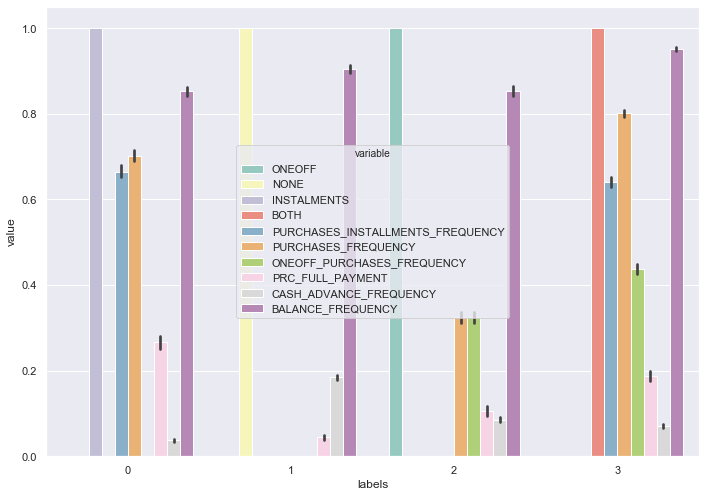

In [144]:
# Calculate the inter-cluster variance in the mean values of each variable
results = pd.DataFrame(columns=['Variable', 'Var'])

# Select top 10 variables with the highest variance of mean values among clusters 
for column in df_mean8.columns:
    results.loc[len(results), :] = [column, np.var(df_mean8[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(10).Variable.values) + ['labels']
tidy = data7[selected_columns].melt(id_vars='labels')
sns.barplot(x='labels', y='value', hue='variable', data=tidy,palette="Set3")

## Conclusion

Let's calculate the Silhouette Score for each algorithm.

In [145]:
# Silhouette Score of K-means
from sklearn import metrics
print("Silhouette Coefficient (kmeans): %0.3f"% metrics.silhouette_score(data5, kmeans_labels))

Silhouette Coefficient (kmeans): 0.454


In [146]:
# Silhouette Score of K-medoids
print("Silhouette Coefficient (kmedoid): %0.3f"% metrics.silhouette_score(data8, kmedoids_labels))

Silhouette Coefficient (kmedoid): 0.474


In [147]:
# Silhouette Score of DBSCAN
print("Silhouette Coefficient (dbscan): %0.3f"% metrics.silhouette_score(data8.iloc[list(data9.index)], data9['label']))

Silhouette Coefficient (dbscan): 0.549


Since, DBSCAN has the highest score, we'll select it's output as the final results.